#             Wine Quality-Red

<a id='import_lib'></a>
# 1. Import Libraries

**Let us import the required libraries and functions**

In [107]:
from warnings import filterwarnings
filterwarnings('ignore')
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Ridge,RidgeCV,ElasticNet,ElasticNetCV

# Read Data

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Analysis and Preparation

### Data preparation is the process of cleaning and transforming raw data prior to building predictive models.

##### Here we will analyze and prepare data to perform regression analysis:
1. Check dimensions of the dataframe in terms of rows and columns
2. Check the data types. Refer data definition to ensure your data types are correct
3. If data types are not as per business context, change the data types as per requirement
4. Study summary statistics
5. Check for missing values
6. Study correlation
7. Perform feature engineering
8. Detect outliers

##### Note: It is an art to explore data and one will need more and more practice to gain expertise in this area.

### Understand the Dataset

#### Data Dimension

In [3]:
df.shape

(1599, 12)

#### Data Types

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Summary Statistics

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1587.000000,1564.000000,1563.000000,1599.000000,1599.000000,1587.000000,1499.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.528292,0.271394,2.529655,0.087467,15.874922,46.312539,0.996681,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179247,0.193910,1.398628,0.047065,10.460157,32.843878,0.001873,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995540,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Missing Value

In [6]:
Total = df.isnull().sum().sort_values(ascending=False) 

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
density,100,6.253909
residual sugar,36,2.251407
citric acid,35,2.188868
total sulfur dioxide,12,0.750469
volatile acidity,12,0.750469
quality,0,0.000000
alcohol,0,0.000000
sulphates,0,0.000000
pH,0,0.000000
free sulfur dioxide,0,0.000000


#### Visualize the Null Values

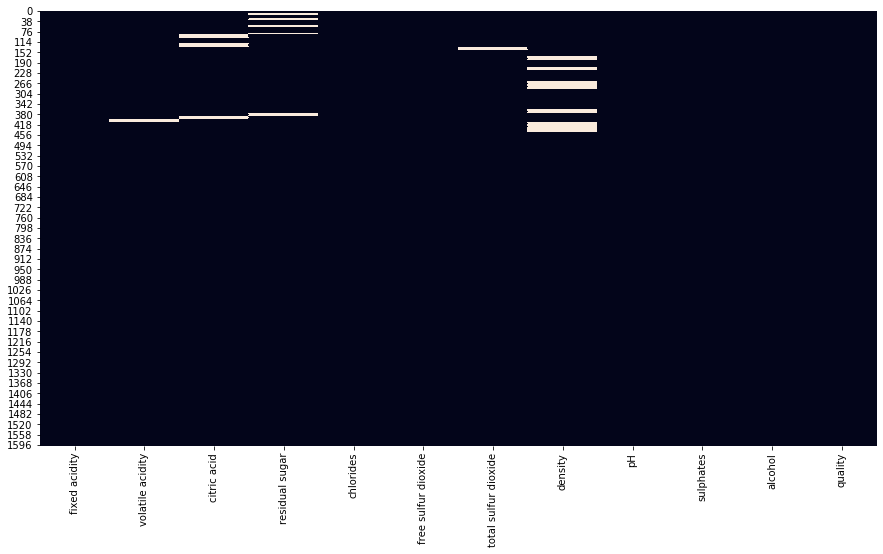

In [7]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

### Missing Value Handling

In [8]:
df['density'].fillna(df['density'].median(), inplace=True)
df['residual sugar'].fillna(df['residual sugar'].median(), inplace=True)
df['citric acid'].fillna(df['citric acid'].median(), inplace=True)
df['total sulfur dioxide'].fillna(df['total sulfur dioxide'].median(), inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].median(), inplace=True)


### Visualize after the missing value handled.

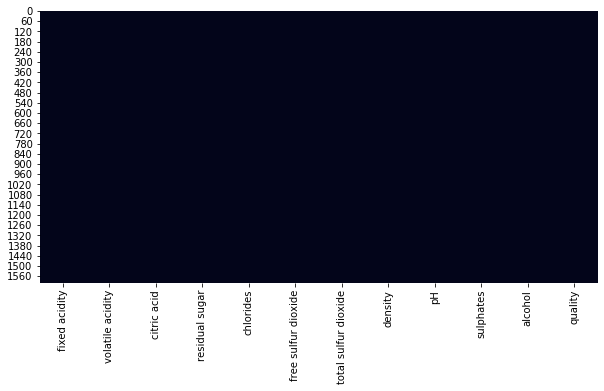

In [9]:
# set the figure size
plt.figure(figsize=(10, 5))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

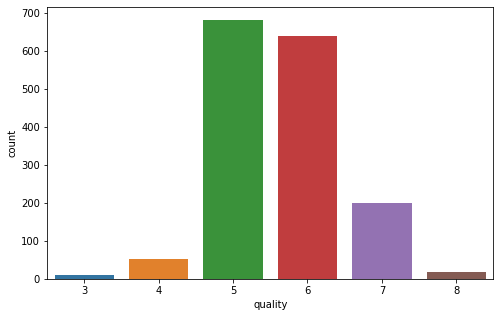

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df )

In [11]:
df['quality'].value_counts()  

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

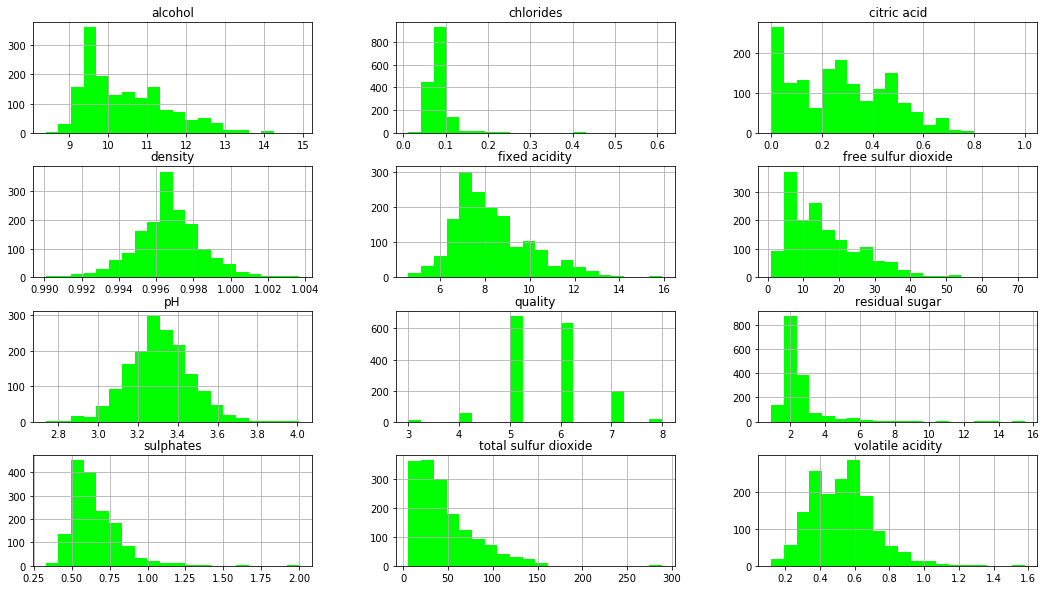

In [12]:
df.hist(bins=20, figsize=(18,10), color='lime')
plt.show()

Text(0, 0.5, 'Features')

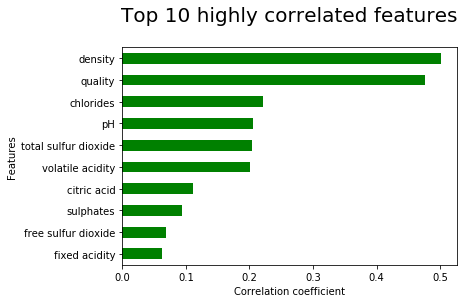

In [13]:
corr_data=df.corr()
corr_data.alcohol.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='green') 
# calculating the top 10 highest correlated features
# with respect to the target variable i.e. "alcohol"
plt.title("Top 10 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

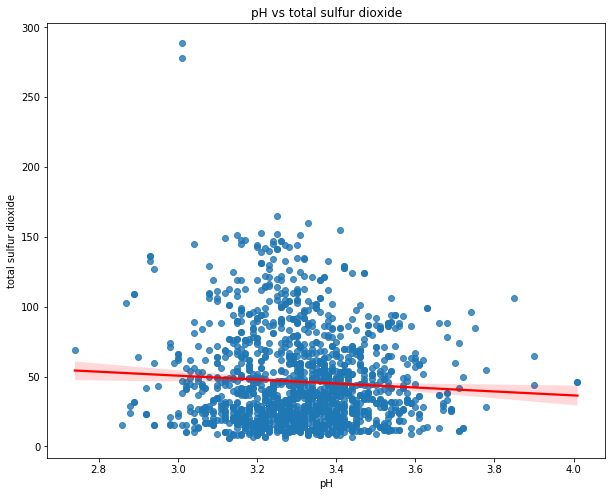

In [14]:
plt.figure(figsize=(10,8))
sns.regplot(x = "pH", y = "total sulfur dioxide", data = df,line_kws={'color':'red'} )
plt.title('pH vs total sulfur dioxide')
plt.show()

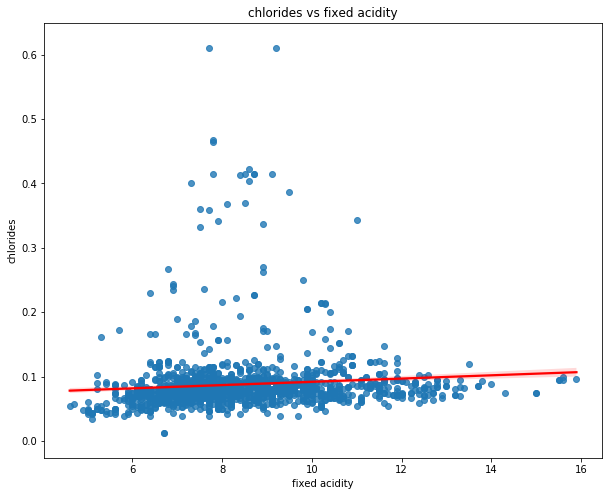

In [15]:
plt.figure(figsize=(10,8))
sns.regplot(x = "fixed acidity", y = "chlorides", data = df,line_kws={'color':'red'})
plt.title('chlorides vs fixed acidity')
plt.show()

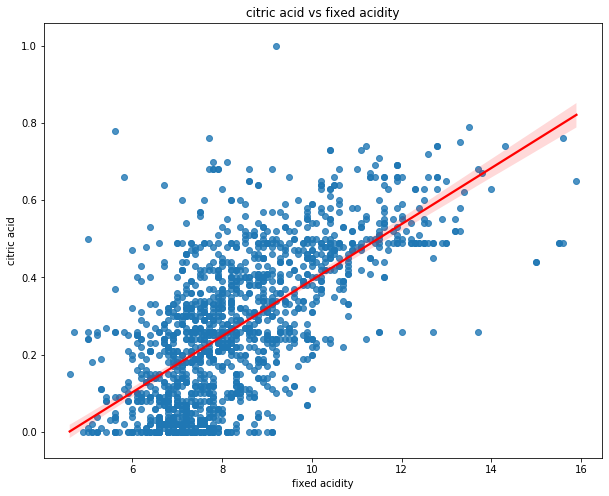

In [16]:
plt.figure(figsize=(10,8))
sns.regplot(x = "fixed acidity", y = "citric acid", data = df,line_kws={'color':'red'})
plt.title('citric acid vs fixed acidity')
plt.show()


<Figure size 1080x720 with 0 Axes>

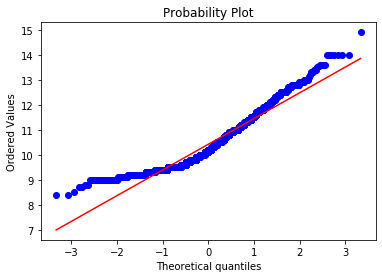

In [17]:
plt.figure(figsize=(15,10))
fig = plt.figure()
stats.probplot(df['alcohol'], plot=plt)
plt.show()

In [18]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

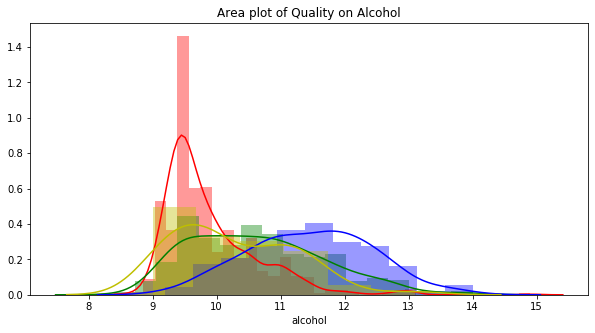

In [19]:
yt0 = df[df['quality']==5]
yt1 = df[df['quality']==6]
yt2 = df[df['quality']==7]
yt3 = df[df['quality']==4]

plt.figure(figsize=(10, 5))
sns.distplot(yt0['alcohol'], color='r')
sns.distplot(yt1['alcohol'], color='g')
sns.distplot(yt2['alcohol'], color='b')
sns.distplot(yt3['alcohol'], color='y')
plt.title('Area plot of Quality on Alcohol')
plt.show()

Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. 
This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial 
correlation. The closer to 4, the more evidence for negative serial correlation

## Checking the correlation

In [35]:
num_col = df.select_dtypes(include=np.number)
num_col.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [36]:
corr = num_col.corr()

# print the correlation matrix
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.253526,0.658385,0.116074,0.093705,-0.153794,-0.111409,0.624595,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.253526,1.000000,-0.541027,-0.006788,0.060981,-0.014294,0.072271,0.033361,0.234091,-0.261689,-0.201508,-0.389175
citric acid,0.658385,-0.541027,1.000000,0.149232,0.205211,-0.059810,0.032492,0.322526,-0.527320,0.310624,0.110736,0.224354
residual sugar,0.116074,-0.006788,0.149232,1.000000,0.057954,0.175995,0.200585,0.324917,-0.086850,0.004418,0.045217,0.014919
chlorides,0.093705,0.060981,0.205211,0.057954,1.000000,0.005562,0.047308,0.202642,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.014294,-0.059810,0.175995,0.005562,1.000000,0.666841,-0.009250,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.111409,0.072271,0.032492,0.200585,0.047308,0.666841,1.000000,0.080684,-0.066704,0.043171,-0.204813,-0.181776
density,0.624595,0.033361,0.322526,0.324917,0.202642,-0.009250,0.080684,1.000000,-0.324855,0.123167,-0.501780,-0.195483
pH,-0.682978,0.234091,-0.527320,-0.086850,-0.265026,0.070377,-0.066704,-0.324855,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.261689,0.310624,0.004418,0.371260,0.051658,0.043171,0.123167,-0.196648,1.000000,0.093595,0.251397


## Visualize the correlation

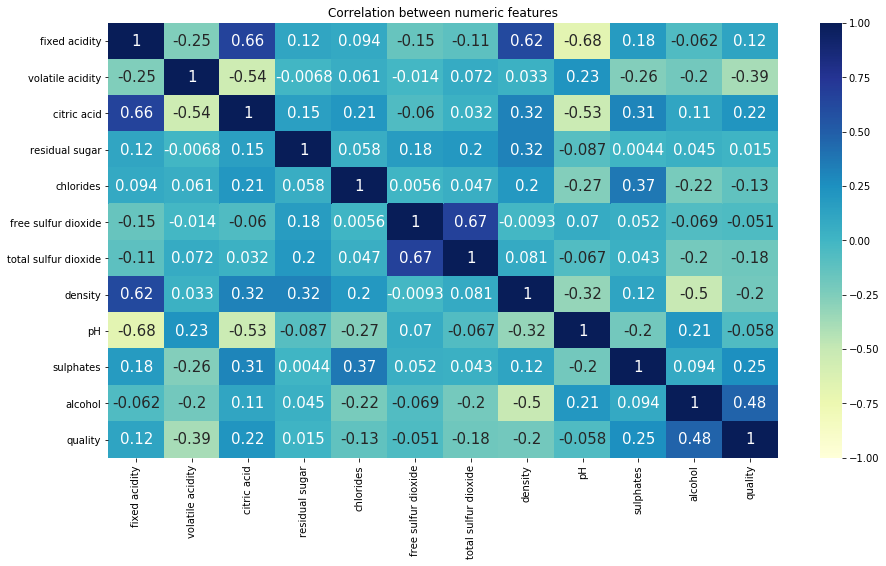

In [37]:
plt.figure(figsize=(15, 8))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0,annot = True, annot_kws={"size": 15}, )

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

# Base Linear Model

In [38]:
from sklearn.linear_model import LinearRegression
X = df.drop('alcohol', axis=1)

# extract the target variable from the data set
y = df['alcohol']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(r2_train, r2_test)
print(rmse_train, rmse_test)

0.6184032040488422 0.6251603061443897
0.6629032592016926 0.6364006297985191


## Discover Outliers

###### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

###### Recollect that one of the assumptions of Linear Regression is there should be no outliers present in the data

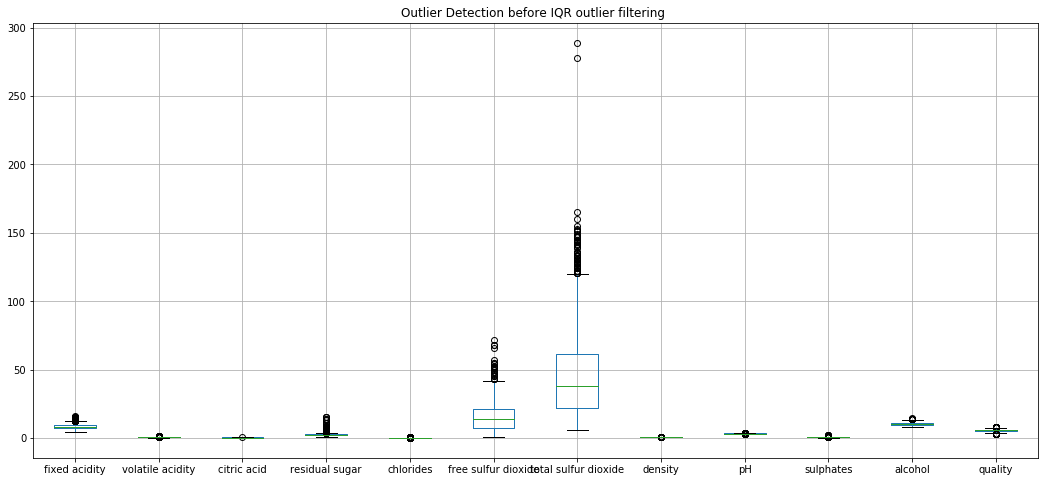

In [42]:
# set the plot size
plt.rcParams['figure.figsize']=(18,8)

# create a boxplot for all numeric features
# column: selects the specified columns
df.boxplot()
plt.title('Outlier Detection before IQR outlier filtering ')
# to display the plot
plt.show()

### Using IQR Method

In [43]:
Q1 = df.drop(['alcohol'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q3 = df.drop(['alcohol'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

# print the IQR values for numeric variables
print(IQR)

fixed acidity            2.10000
volatile acidity         0.25000
citric acid              0.32000
residual sugar           0.70000
chlorides                0.02000
free sulfur dioxide     14.00000
total sulfur dioxide    39.50000
density                  0.00207
pH                       0.19000
sulphates                0.18000
quality                  1.00000
dtype: float64


In [44]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# |: bitwise operator OR in python
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (use "0" for 'index')
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [45]:
df.shape

(1177, 12)

## Linear Regression (OLS)

In [49]:
Xc=sm.add_constant(X)
ol = sm.OLS(y,Xc).fit()

# print the summary output
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     236.5
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:55:14   Log-Likelihood:                -1594.1
No. Observations:                1599   AIC:                             3212.
Df Residuals:                    1587   BIC:                             3277.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  479.4854 

## Checking the Assumptions of the Linear Regression

### Normality of Residuals.

In [30]:
residuals = ol.resid

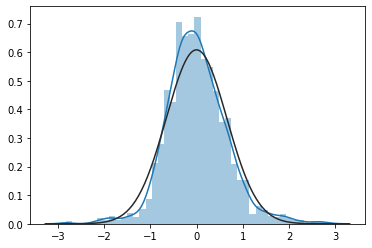

In [31]:
from scipy.stats import norm
norm.fit(residuals)
sns.distplot(residuals, fit = norm) 
plt.show()

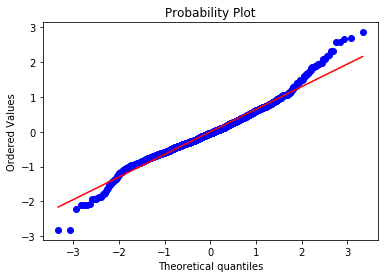

In [32]:
# Q-Q plot

import scipy.stats as st
st.probplot(residuals, plot = plt)
plt.show()

In [33]:
## Jarque-Berra Test
print(st.jarque_bera(residuals))

#since p value is less than the significance level , we will reject the H0 and conclude that residuals are not normal

(231.23912543817994, 0.0)


### Checking Multi collinearity

### VIF (Variance Inflation Factor)

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf = [vif(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vf, index=Xc.columns, columns=['vif'])

,vif
const,986597.272407
fixed acidity,4.635598
volatile acidity,1.998843
citric acid,2.886328
residual sugar,1.226302
chlorides,1.264216
free sulfur dioxide,1.838559
total sulfur dioxide,2.055144
density,2.392281
pH,2.367121


### Detecting Autocorrelation

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis

The null and alternate hypothesis of Durbin-Watson test is as follows:

      H0: There is no autocorrelation in the residuals
      H1: There is autocorrelation in the residuals

From the summary output for this dataset we see that the Durbin-Watson static is 1.565

Hence we can conclude that there is no autocorrelation.

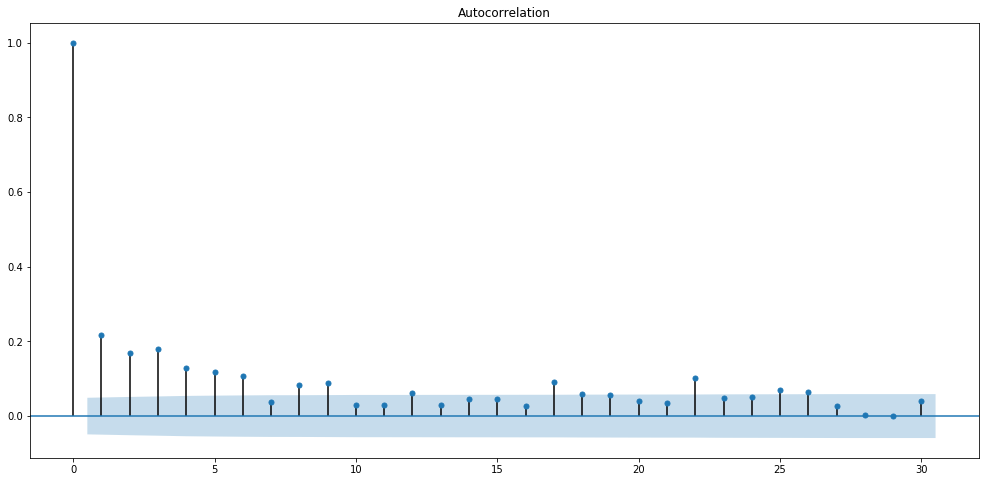

In [92]:
import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(residuals,lags=30)
plt.show()

### Detecting Homoskedasticity

Hypothesis to be tested


H0:variance (residuals) is constant across the range of data

H1: variance (residuals) is not constant across the range of data  


In [ ]:
test=sms.het_goldfeldquandt(y=residuals,x=Xc)
test

since p value(0.999) is higher than  the significance level,we will accept the H0 to conclude that variance(residuals) is
constant 

### Linearity of Residuals

Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. 


Hypothesis

H0: fit of model using full sample = fit of model using a central subset (linear relationship)

H1: fit of model using full sample is worse compared  to fit of model using a central subset
    


In [96]:
#Test for Linerity 
sm.stats.diagnostic.linear_rainbow(ol,frac=0.5)

(0.98528087517193, 0.5710971169576552)

since p value is 0.57 is higher than the significance level we will accept H0 to 
conclude that there is a linear relationship between residuals and y_pred(model is appropriate)

# Feature Selection

### RFE -Recursive Feature Elimination

In [51]:
sklearn.metrics.SCORERS.keys()

<IPython.core.display.Javascript object>

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [52]:
X.shape

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

lir=LinearRegression()

rfe = RFE(lir,n_features_to_select=10)
rfe.fit(X,y)

pd.DataFrame(rfe.ranking_,index=X.columns,columns=['select']).sort_values(by='select')

,select
fixed acidity,1
volatile acidity,1
citric acid,1
residual sugar,1
chlorides,1
total sulfur dioxide,1
density,1
pH,1
sulphates,1
quality,1


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

no_of_cols=12
train_score=[]
test_score=[]

for n in range(no_of_cols):
    lir = LinearRegression()
    rfe = RFE(lir, n_features_to_select=n+1)
    rfe.fit(X_train, y_train)
    
    score1 = rfe.score(X_train, y_train)
    train_score.append(score1)

    score2 = rfe.score(X_test, y_test)
    test_score.append(score2)


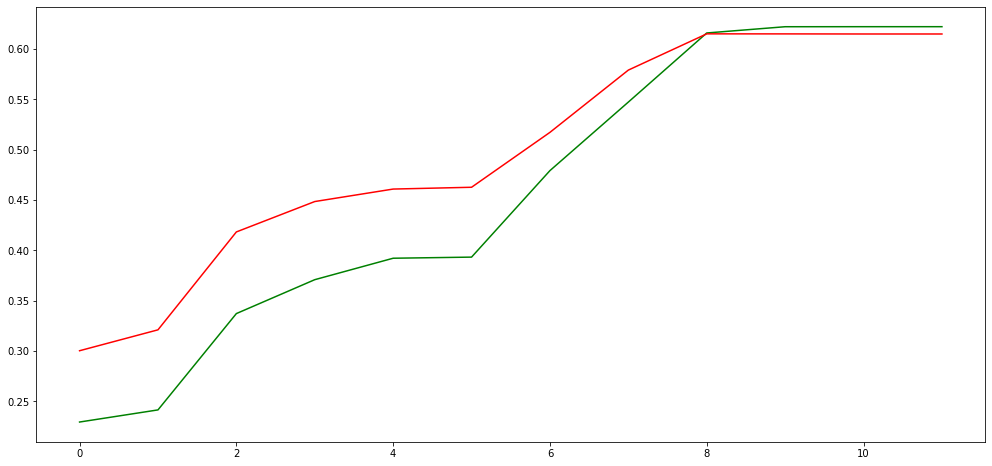

In [54]:
plt.plot(train_score,'g')
plt.plot(test_score,'r')
plt.show()

In [55]:
idx=np.linspace(1,12,12)
rf=pd.DataFrame(test_score,columns=['r-sq']).sort_values(by='r-sq',ascending=False)
rf

,r-sq
8,0.615181
9,0.615137
10,0.615042
11,0.615042
7,0.579181
6,0.517337
5,0.462793
4,0.461006
3,0.448611
2,0.418422


### RFE Cv

In [56]:
from sklearn.feature_selection import RFECV

In [57]:
lir=LinearRegression()
rfecv=RFECV(lir,cv=3,scoring='r2')
rfecv.fit(X,y)

RFECV(cv=3, estimator=LinearRegression(), scoring='r2')

In [58]:
rfecv.grid_scores_

array([0.17923575, 0.19809867, 0.25625352, 0.27726156, 0.34729815,
       0.35874266, 0.41168388, 0.47573967, 0.52462032, 0.51512859,
       0.51505613])

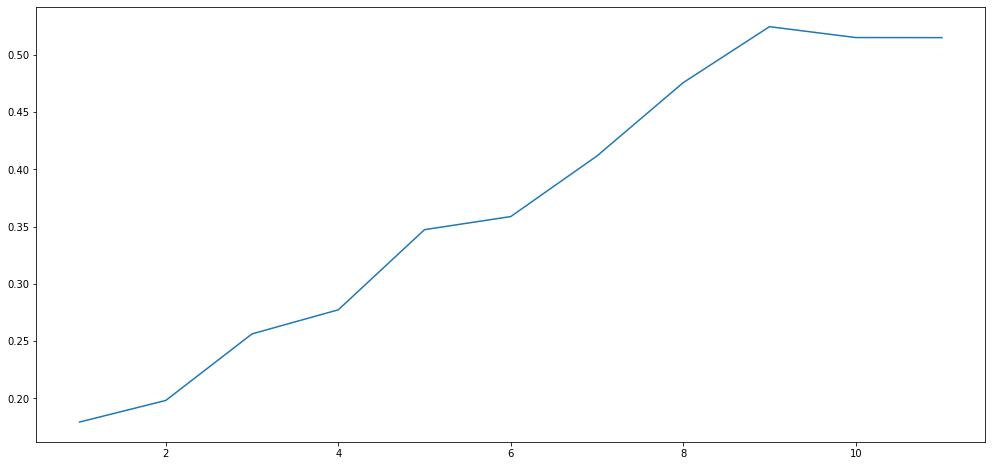

In [59]:
plt.plot(range(1,12),rfecv.grid_scores_)

In [60]:
rf=pd.DataFrame(rfecv.grid_scores_,index=range(1,12),columns=['scores'])
rf.sort_values(by='scores',ascending=False)

,scores
9,0.524620
10,0.515129
11,0.515056
8,0.475740
7,0.411684
6,0.358743
5,0.347298
4,0.277262
3,0.256254
2,0.198099


In [61]:
pd.DataFrame(rfecv.ranking_, index=X.columns, columns=['select']).sort_values(by='select')


,select
fixed acidity,1
volatile acidity,1
citric acid,1
residual sugar,1
chlorides,1
density,1
pH,1
sulphates,1
quality,1
total sulfur dioxide,2


In [62]:
y = df['alcohol']
X1 =df.drop(['alcohol','total sulfur dioxide'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

lir = LinearRegression(fit_intercept=True)

lir.fit(X_train, y_train)
y_train_pred = lir.predict(X_train)

r2_Train = r2_score(y_train, y_train_pred)
rmse_Train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print('r2-Train: ', r2_Train, 'rmse_Train: ', rmse_Train)

y_test_pred = lir.predict(X_test)

r2_Test = r2_score(y_test, y_test_pred)
rmse_Test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2-Test: ', r2_Test, 'rmse_Test: ', rmse_Test)


r2-Train:  0.6732909839658876 rmse_Train:  0.5535632254694237
r2-Test:  0.661940976055872 rmse_Test:  0.5593016028672669


In [63]:
Xc=sm.add_constant(X1)
ol = sm.OLS(y,Xc).fit()

# print the summary output
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     237.4
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          6.89e-273
Time:                        07:55:35   Log-Likelihood:                -976.54
No. Observations:                1177   AIC:                             1975.
Df Residuals:                    1166   BIC:                             2031.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 547.3529    

### Forward Selection Approaches 

In [122]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

y=df['alcohol']
X=df.drop('alcohol',axis=1)

cols=list(X.columns)



In [123]:
X.shape[1]

11

In [124]:
lir = LinearRegression()
sfs1=sfs(lir,k_features=9,forward=True,scoring='r2',cv=3,verbose=2)
sfs1=sfs1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-04-14 10:35:55] Features: 1/9 -- score: 0.15939685709724127[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-04-14 10:35:55] Features: 2/9 -- score: 0.3410155760780358[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-04-14 10:35:55] Features: 3/9 -- score: 0.42673740924665715[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [125]:
sf=pd.DataFrame(sfs1.subsets_).T
sf

,feature_idx,cv_scores,avg_score,feature_names
1,"(7,)","[-0.2539237192921566, 0.4042097607082461, 0.32...",0.159397,"(density,)"
2,"(7, 10)","[0.06116696695915402, 0.5591103920802568, 0.40...",0.341016,"(density, quality)"
3,"(3, 7, 10)","[0.17920897204813369, 0.5943984972942058, 0.50...",0.426737,"(residual sugar, density, quality)"
4,"(0, 3, 7, 10)","[0.2213779537491366, 0.681097770094074, 0.5681...",0.490196,"(fixed acidity, residual sugar, density, quality)"
5,"(0, 3, 7, 8, 10)","[0.3254323569969395, 0.771661695583353, 0.6713...",0.589475,"(fixed acidity, residual sugar, density, pH, q..."
6,"(0, 3, 7, 8, 9, 10)","[0.3231811228426774, 0.7840703099069906, 0.692...",0.599998,"(fixed acidity, residual sugar, density, pH, s..."
7,"(0, 3, 6, 7, 8, 9, 10)","[0.323313281661185, 0.7901237529586973, 0.7016...",0.605029,"(fixed acidity, residual sugar, total sulfur d..."
8,"(0, 2, 3, 6, 7, 8, 9, 10)","[0.32941116597706677, 0.7927187379653259, 0.70...",0.610093,"(fixed acidity, citric acid, residual sugar, t..."
9,"(0, 1, 2, 3, 6, 7, 8, 9, 10)","[0.33612961443687295, 0.7917704554356788, 0.70...",0.611598,"(fixed acidity, volatile acidity, citric acid,..."


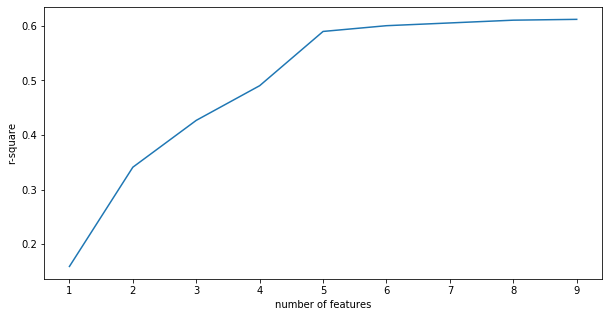

In [126]:
plt.figure(figsize=(10,5))
plt.plot(sf.index,sf['avg_score'])
plt.xlabel('number of features')
plt.ylabel('r-square')
plt.show()

In [127]:
sf[sf['avg_score']==sf['avg_score'].max()]['feature_names']

9    (fixed acidity, volatile acidity, citric acid,...
Name: feature_names, dtype: object

In [128]:
sfs1=sfs(lir,k_features=8,forward=True,scoring='r2',cv=3)
sfs1=sfs1.fit(X,y)

In [129]:
selected_features=list(sfs1.k_feature_names_)
selected_features

['fixed acidity',
 'citric acid',
 'residual sugar',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'quality']

In [130]:
y = df['alcohol']
X1 = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

lir = LinearRegression(fit_intercept=True)

lir.fit(X_train, y_train)
y_train_pred = lir.predict(X_train)

r2_Train = r2_score(y_train, y_train_pred)
rmse_Train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print('r2-Train: ', r2_Train, 'rmse_Train: ', rmse_Train)

y_test_pred = lir.predict(X_test)

r2_Test = r2_score(y_test, y_test_pred)
rmse_Test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2-Test: ', r2_Test, 'rmse_Test: ', rmse_Test)


r2-Train:  0.6725076917733424 rmse_Train:  0.5542264183259482
r2-Test:  0.6654137098996633 rmse_Test:  0.5564214556603758


In [131]:
Xc=sm.add_constant(X)
ol = sm.OLS(y,Xc).fit()

# print the summary output
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          7.46e-275
Time:                        10:36:01   Log-Likelihood:                -969.15
No. Observations:                1177   AIC:                             1962.
Df Residuals:                    1165   BIC:                             2023.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  535.6001 

# Regularition



In [108]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs=ss.fit_transform(X)
Xs=pd.DataFrame(Xs,columns=X.columns)

# Ridge Regression

In [109]:
ridge=Ridge(alpha=10)
ridge.fit(Xs,y)

pd.DataFrame(ridge.coef_,index=X.columns,columns=['coefs'])

,coefs
fixed acidity,0.484867
volatile acidity,0.079266
citric acid,0.149684
residual sugar,0.286853
chlorides,-0.020698
free sulfur dioxide,0.017328
total sulfur dioxide,-0.093905
density,-0.798662
pH,0.343603
sulphates,0.115103


In [110]:
y_pred=ridge.predict(Xs)
r2_score(y,y_pred)

0.6742947054065379

#### Find out thye best alpha through cross validation

In [112]:
alphas=np.logspace(-3,2, 100)

ridgecv=RidgeCV(alphas=alphas,cv=3)
ridgecv.fit(Xs,y)

RidgeCV(alphas=array([1.00000000e-03, 1.12332403e-03, 1.26185688e-03, 1.41747416e-03,
       1.59228279e-03, 1.78864953e-03, 2.00923300e-03, 2.25701972e-03,
       2.53536449e-03, 2.84803587e-03, 3.19926714e-03, 3.59381366e-03,
       4.03701726e-03, 4.53487851e-03, 5.09413801e-03, 5.72236766e-03,
       6.42807312e-03, 7.22080902e-03, 8.11130831e-03, 9.11162756e-03,
       1.02353102e-02, 1.14975700e-0...
       6.89261210e+00, 7.74263683e+00, 8.69749003e+00, 9.77009957e+00,
       1.09749877e+01, 1.23284674e+01, 1.38488637e+01, 1.55567614e+01,
       1.74752840e+01, 1.96304065e+01, 2.20513074e+01, 2.47707636e+01,
       2.78255940e+01, 3.12571585e+01, 3.51119173e+01, 3.94420606e+01,
       4.43062146e+01, 4.97702356e+01, 5.59081018e+01, 6.28029144e+01,
       7.05480231e+01, 7.92482898e+01, 8.90215085e+01, 1.00000000e+02]),
        cv=3)

In [113]:
ridgecv.alpha_

4.328761281083057

In [114]:
ridge=Ridge(ridgecv.alpha_)
ridge.fit(Xs,y)

pd.DataFrame(ridge.coef_,index=X.columns,columns=['coefs'])

,coefs
fixed acidity,0.504014
volatile acidity,0.081076
citric acid,0.147946
residual sugar,0.289048
chlorides,-0.018110
free sulfur dioxide,0.016313
total sulfur dioxide,-0.091151
density,-0.813313
pH,0.354685
sulphates,0.115286


In [115]:
y_pred=ridge.predict(Xs)
r2_score(y,y_pred)

0.6746187717316354

## Elastic Net

In [116]:
enet=ElasticNet(alpha=0.1,max_iter=10000)
enet.fit(Xs,y)

pd.DataFrame(enet.coef_,index=X.columns,columns=['coefs'])

,coefs
fixed acidity,0.157684
volatile acidity,-0.000000
citric acid,0.096398
residual sugar,0.204235
chlorides,-0.020775
free sulfur dioxide,-0.000000
total sulfur dioxide,-0.073615
density,-0.540111
pH,0.112474
sulphates,0.092346


#### Tunning to find out the best alphas

In [118]:
alphas=np.logspace(-3, 0, 1000)

enetcv=ElasticNetCV(alphas=alphas,cv=3,max_iter=10000,random_state=5)
enetcv.fit(Xs,y)

ElasticNetCV(alphas=array([0.001     , 0.00100694, 0.00101393, 0.00102096, 0.00102804,
       0.00103518, 0.00104236, 0.00104959, 0.00105688, 0.00106421,
       0.00107159, 0.00107903, 0.00108652, 0.00109405, 0.00110165,
       0.00110929, 0.00111699, 0.00112474, 0.00113254, 0.0011404 ,
       0.00114831, 0.00115628, 0.0011643 , 0.00117238, 0.00118052,
       0.00118871, 0.00119696, 0.00120526, 0.00121362, 0.00122204,...
       0.81830068, 0.82397857, 0.82969585, 0.83545281, 0.8412497 ,
       0.84708683, 0.85296445, 0.85888286, 0.86484233, 0.87084315,
       0.87688561, 0.88297   , 0.8890966 , 0.89526571, 0.90147763,
       0.90773265, 0.91403107, 0.9203732 , 0.92675933, 0.93318977,
       0.93966483, 0.94618482, 0.95275005, 0.95936083, 0.96601748,
       0.97272032, 0.97946967, 0.98626585, 0.99310918, 1.        ]),
             cv=3, max_iter=10000, random_state=5)

In [119]:
enetcv.alpha_

0.004242556430717777

In [120]:
enet=ElasticNet(alpha=enetcv.alpha_,max_iter=10000)
enet.fit(Xs,y)

pd.DataFrame(enet.coef_,index=X.columns,columns=['coefs'])

,coefs
fixed acidity,0.500253
volatile acidity,0.073260
citric acid,0.140935
residual sugar,0.287055
chlorides,-0.016630
free sulfur dioxide,0.010661
total sulfur dioxide,-0.085862
density,-0.809611
pH,0.350714
sulphates,0.114403


In [121]:
y_pred=enet.predict(Xs)
r2_score(y,y_pred)   

0.674466160548798

## Rechecking The Linear OlS Model

In [90]:
Xc=sm.add_constant(X)
ol = sm.OLS(y,Xc).fit()

# print the summary output
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          7.46e-275
Time:                        07:59:31   Log-Likelihood:                -969.15
No. Observations:                1177   AIC:                             1962.
Df Residuals:                    1165   BIC:                             2023.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  535.6001 